In [1]:
#group name starts with...
gname='B13002'


#Group description
import pandas as pd 
title=pd.read_csv("C:\\Users\\angel\\Documents\\TABLE-LISTING.csv")
print('Group description is: ' + title[title['GROUP NAME'].str.contains(gname)].iloc[40]['GROUP DESCRIPTION'])



path=%pwd #Current path. I work in this path all throughout

# I put together all the files containing the group name in the path above, then zipped the folder.
# Now we can unzip it and work from one path only. Uncomment the next 4 lines once you have the zip archive. 
# If you already have all the files uploaded, you can ignode the next step. 



import zipfile as zf
files = zf.ZipFile("birth.zip", 'r')
files.extractall(path)  #input the path %pwd here
files.close()





Group description is: WOMEN 15 TO 50 YEARS WHO HAD A BIRTH IN THE PAST 12 MONTHS BY MARITAL STATUS AND
AGE


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_files = os.listdir(path)  #input the path %pwd here

In [6]:

#long ethnicity labels
ethnicityLabels={'White alone':'A', "Black or African-American alone":'B', "American Indian or Alaska Native alone":'C', 
           "Asian alone":'D', 'Native Hawaiian and other Pacific Islander alone':'E', 'Some other race': 'F', 'Two or more races': 'G', 'White alone, not Hispanic or Latino':'H', 'Hispanic or Latino':'I' }


#short labels for graphing
ShortenedLabels={'White alone':'White', "Black or African-American alone":'Black', "American Indian or Alaska Native alone":'Native American', 
           "Asian alone":'Asian', 'Native Hawaiian and other Pacific Islander alone':'Pacific Islander', 'Some other race': 'Other', 'Two or more races': 'Two ore more races','White alone, not Hispanic or Latino':'White, not Hispanic or Latino', 'Hispanic or Latino':'Hispanic or Latino' }


#Next we read the data files; each race/ethnicity as one key in the dictionary

#extract file names
data_files_DATA_byrace=dict()
data_files_LEGEND_byrace=dict()

ethnicityLabels.keys()
for label in ethnicityLabels:
    labelLong=gname+ethnicityLabels[label]+'_'
    forLabel_DATA=[f for f in os.listdir(path) if labelLong in f and 'DATA' in f]
    forLabel_LEGEND=[f for f in os.listdir(path) if labelLong in f and 'LEGEND' in f and 'csv' in f]
    data_files_DATA_byrace[label]=forLabel_DATA
    data_files_LEGEND_byrace[label]=forLabel_LEGEND

    
#actual dataframes
    
data_byrace=dict()
legend_byrace=dict()
for label in ethnicityLabels:
    data_byrace[label]=[pd.read_csv(file) for file in  data_files_DATA_byrace[label]]
    legend_byrace[label]=[pd.read_csv(file) for file in data_files_LEGEND_byrace[label]]

    

In [7]:
#see what an entry in the dictionary looks like. This will show if you have any missing years
data_files_DATA_byrace['Black or African-American alone']

['acs-acs1-2007-GROUP_B13002B_DATA.csv',
 'acs-acs1-2008-GROUP_B13002B_DATA.csv',
 'acs-acs1-2009-GROUP_B13002B_DATA.csv',
 'acs-acs1-2010-GROUP_B13002B_DATA.csv',
 'acs-acs1-2011-GROUP_B13002B_DATA.csv',
 'acs-acs1-2012-GROUP_B13002B_DATA.csv',
 'acs-acs1-2013-GROUP_B13002B_DATA.csv',
 'acs-acs1-2014-GROUP_B13002B_DATA.csv',
 'acs-acs1-2015-GROUP_B13002B_DATA.csv',
 'acs-acs1-2016-GROUP_B13002B_DATA.csv',
 'acs-acs1-2017-GROUP_B13002B_DATA.csv',
 'acs-acs1-2018-GROUP_B13002B_DATA.csv']

In [8]:
#see what the data frame for 2005 looks like.
data_byrace['Black or African-American alone'][0].head()


,B13002B_001E,B13002B_001EA,B13002B_001M,B13002B_001MA,B13002B_002E,B13002B_002EA,B13002B_002M,B13002B_002MA,B13002B_003E,B13002B_003EA,...,B13002B_006EA,B13002B_006M,B13002B_006MA,B13002B_007E,B13002B_007EA,B13002B_007M,B13002B_007MA,GEO_ID,NAME,us
0,10446347,NaN,20936,NaN,597062,NaN,14277,NaN,196177,NaN,...,NaN,22420,NaN,6929019,NaN,31648,NaN,0100000US,United States,1


In [9]:
#### WARNING: running this cell twice will give an error. RUN ONE TIME ONLY 



#Now we put the years together


#INPUT HERE: available years. See from above
years=[2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]



for label in data_byrace:
    for n in range(len(years)):
        data_byrace[label][n].rename(index={0: years[n]}, inplace=True)            #rename index values to years

for label in data_byrace:
    dataFrames=data_byrace[label].copy()
    dataFrame=dataFrames[0].T.copy()
    for n in range(1, len(years)):
        dataFrame=dataFrame.join(dataFrames[n].T)     #Merge the years. We use transpose to join by variables
    data_byrace[label]=dataFrame.T    

    
#to see what each frame looks like, uncomment the next line
#data_byrace['Black or African-American alone']


    

In [11]:
#Looking at egend to pick variables
legend_byrace['Black or African-American alone'][0]['LABEL'].values

array(['Estimate!!Total',
       'Estimate!!Total!!Women who had a birth in the past 12 months',
       'Estimate!!Total!!Women who had a birth in the past 12 months!!Now married (including separated and spouse absent)',
       'Estimate!!Total!!Women who had a birth in the past 12 months!!Unmarried (never married, widowed and divorced)',
       'Estimate!!Total!!Women who did not have a birth in the past 12 months',
       'Estimate!!Total!!Women who did not have a birth in the past 12 months!!Now married (including separated and spouse absent)',
       'Estimate!!Total!!Women who did not have a birth in the past 12 months!!Unmarried (never married, widowed and divorced)',
       'Margin of Error!!Total',
       'Margin of Error!!Total!!Women who had a birth in the past 12 months',
       'Margin of Error!!Total!!Women who had a birth in the past 12 months!!Now married (including separated and spouse absent)',
       'Margin of Error!!Total!!Women who had a birth in the past 12 months

In [12]:
#now dealing with variables

#INPUT HERE:  the variables that you want to work with. 
variables=['001E', '002E', '003E', '004E','005E']



#Now we input labels to each variable
                  
file=legend_byrace['Black or African-American alone'][0].copy()
file.set_index('VARIABLE', inplace=True)
file=file.T
cols=list(file.columns)
longNamesVariables=dict()
for suffix in variables:
    for variableName in cols:
        if variableName[-4:]==suffix:
            longName=variableName
    longNamesVariables[suffix]=file[longName]['LABEL']


#set up short names to variables, for plotting. Adjust based on data frame; this one is by age
shortNamesVariables=dict()
for suffix in variables:
    for variableName in cols:
        if variableName[-4:]==suffix:
            longName=variableName
    shortLabel=file[longName]['LABEL'][17:].replace('!!', ': ')   ##Cutting out the Estimate!!Total piece. Might need to adjust
    shortNamesVariables[longNamesVariables[suffix]]=shortLabel
    if len(shortLabel)==0:
        shortNamesVariables[longNamesVariables[suffix]]='All women aged 15-50' ##Setting up name for variable which was Estimate!!Total


#to see the labels, uncomment the next 2 lines
# print(longNamesVariables)
# print(shortNamesVariables)


#Now setting up variables for each ethnicity/race
#probably overkill, but should let us know if an variables are missing

ethnicityVars=dict()
for label in ethnicityLabels:
    ethnicityVars[label]=[]
    file=legend_byrace[label][0].copy()
    file.set_index('VARIABLE', inplace=True)
    file=file.T
    cols=list(file.columns)
    for suffix in variables:
        for variableName in cols:
            if variableName[-4:]==suffix:
                name=variableName
        ethnicityVars[label].append(name)

#print(ethnicityVars)        
    
for label in ethnicityLabels:
    dataFrame=data_byrace[label].copy()
    dataFrame=dataFrame[ethnicityVars[label]]
    data_byrace[label]=dataFrame


In [13]:
# This is what each frame looks like, with only variables we will work with.
# Next we will update the labels for each variable to make it more readable
data_byrace['Black or African-American alone']

,B13002B_001E,B13002B_002E,B13002B_003E,B13002B_004E,B13002B_005E
2007,10446347,597062,196177,400885,9849285
2008,10515312,645389,211046,434343,9869923
2009,10602879,658205,204787,453418,9944674
2010,10705227,634585,206012,428573,10070642
2011,10678168,595983,192163,403820,10082185
2012,10704263,612819,200371,412448,10091444
2013,10729458,572070,187851,384219,10157388
2014,10793190,577974,195128,382846,10215216
2015,10817292,569659,190252,379407,10247633
2016,1.0787e+07,586241,211987,374254,1.02008e+07


In [14]:
#Now we update labels for variables
for label in ethnicityLabels:
    cols=list(data_byrace[label].columns)
    for col in cols:
        data_byrace[label].rename(columns={col: shortNamesVariables[longNamesVariables[col[-4:]]]}, inplace=True)
    

In [15]:
#This is what each data frame looks like now
data_byrace['Black or African-American alone']

,All women aged 15-50,Women who had a birth in the past 12 months,Women who had a birth in the past 12 months: Now married (including separated and spouse absent),"Women who had a birth in the past 12 months: Unmarried (never married, widowed and divorced)",Women who did not have a birth in the past 12 months
2007,10446347,597062,196177,400885,9849285
2008,10515312,645389,211046,434343,9869923
2009,10602879,658205,204787,453418,9944674
2010,10705227,634585,206012,428573,10070642
2011,10678168,595983,192163,403820,10082185
2012,10704263,612819,200371,412448,10091444
2013,10729458,572070,187851,384219,10157388
2014,10793190,577974,195128,382846,10215216
2015,10817292,569659,190252,379407,10247633
2016,1.0787e+07,586241,211987,374254,1.02008e+07


In [16]:
#Add 'Not Black or African-American'

ethnicityLabels['All']=''

data_byrace['All']= data_byrace['White alone']+data_byrace['Black or African-American alone']+data_byrace["American Indian or Alaska Native alone"]+data_byrace['Asian alone']+data_byrace['Native Hawaiian and other Pacific Islander alone']+data_byrace['Some other race']+data_byrace['Two or more races']
data_byrace['All']

,All women aged 15-50,Women who had a birth in the past 12 months,Women who had a birth in the past 12 months: Now married (including separated and spouse absent),"Women who had a birth in the past 12 months: Unmarried (never married, widowed and divorced)",Women who did not have a birth in the past 12 months
2007,76085482,4183633,2782066,1401567,71901849
2008,75960920,4436577,2915483,1521094,71524343
2009,75966854,4333485,2806692,1526793,71633369
2010,76352003,4168720,2666848,1501872,72183283
2011,76202126,4113472,2646037,1467435,72088654
2012,76187270,4125353,2641377,1483976,72061917
2013,76129362,3930417,2514794,1415623,72198945
2014,76395472,3946228,2534879,1411349,72449244
2015,76551119,3931053,2529620,1401433,72620066
2016,7.64836e+07,3.9469e+06,2.56598e+06,1.38092e+06,7.25367e+07


In [17]:
## Implement some test to see that everything works out, and all variables are consistent across years
## One idea is to subract from total column
for label in ethnicityLabels:
    print(data_byrace[label]["Women who had a birth in the past 12 months"]-data_byrace[label]["Women who had a birth in the past 12 months: Now married (including separated and spouse absent)"]-data_byrace[label]['Women who had a birth in the past 12 months: Unmarried (never married, widowed and divorced)'])

2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
dtype: object
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
dtype: object
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
dtype: object
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
dtype: object
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
dtype: object
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
dtype: object
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
dtype: object
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
20

In [15]:
# The previous dataframes contained too many columns. Now we make the excel version, where we sum all races/ethnicities except for Black
# Again, there are definitely better ways to do this :)

excelVersion=pd.DataFrame(index=data_byrace['Black or African-American alone'].index)
for label in ['Black or African-American alone', 'White alone, not Hispanic or Latino', 'All']:
    excelVersion[label+': All women age 15-50']=data_byrace[label]['All women aged 15-50']
    excelVersion[label+': Women who did not have a birth in the past 12 months']=data_byrace[label]['Women who did not have a birth in the past 12 months']
    excelVersion[label+': Women who had a birth in the past 12 months']=data_byrace[label]['Women who had a birth in the past 12 months']
    excelVersion[label+': Women who had a birth in the past 12 months: Now married (including separated and spouse absent)']=data_byrace[label]['Women who had a birth in the past 12 months: Now married (including separated and spouse absent)']
    excelVersion[label+": Women who had a birth in the past 12 months: Unmarried (never married, widowed and divorced)"]=data_byrace[label]["Women who had a birth in the past 12 months: Unmarried (never married, widowed and divorced)"]
    excelVersion[label+', fraction: Women who did not have a birth in the past 12 months']=excelVersion[label+': Women who did not have a birth in the past 12 months']/excelVersion[label+': All women age 15-50']
    excelVersion[label+", fraction: Women who had a birth in the past 12 months: Now married (including separated and spouse absent)"]=excelVersion[label+': Women who had a birth in the past 12 months: Now married (including separated and spouse absent)']/excelVersion[label+': Women who had a birth in the past 12 months']
    excelVersion[label+", fraction: Women who had a birth in the past 12 months: Unmarried (never married, widowed and divorced)"]=excelVersion[label+': Women who had a birth in the past 12 months: Unmarried (never married, widowed and divorced)']/excelVersion[label+': Women who had a birth in the past 12 months']


In [16]:
excelVersion

,Black or African-American alone: All women age 15-50,Black or African-American alone: Women who did not have a birth in the past 12 months,Black or African-American alone: Women who had a birth in the past 12 months,Black or African-American alone: Women who had a birth in the past 12 months: Now married (including separated and spouse absent),"Black or African-American alone: Women who had a birth in the past 12 months: Unmarried (never married, widowed and divorced)","Black or African-American alone, fraction: Women who did not have a birth in the past 12 months","Black or African-American alone, fraction: Women who had a birth in the past 12 months: Now married (including separated and spouse absent)","Black or African-American alone, fraction: Women who had a birth in the past 12 months: Unmarried (never married, widowed and divorced)","White alone, not Hispanic or Latino: All women age 15-50","White alone, not Hispanic or Latino: Women who did not have a birth in the past 12 months",...,"White alone, not Hispanic or Latino, fraction: Women who had a birth in the past 12 months: Now married (including separated and spouse absent)","White alone, not Hispanic or Latino, fraction: Women who had a birth in the past 12 months: Unmarried (never married, widowed and divorced)",All: All women age 15-50,All: Women who did not have a birth in the past 12 months,All: Women who had a birth in the past 12 months,All: Women who had a birth in the past 12 months: Now married (including separated and spouse absent),"All: Women who had a birth in the past 12 months: Unmarried (never married, widowed and divorced)","All, fraction: Women who did not have a birth in the past 12 months","All, fraction: Women who had a birth in the past 12 months: Now married (including separated and spouse absent)","All, fraction: Women who had a birth in the past 12 months: Unmarried (never married, widowed and divorced)"
2007,10446347,9849285,597062,196177,400885,0.942845,0.328571,0.671429,48039103,45667131,...,0.754233,0.245767,76085482,71901849,4183633,2782066,1401567,0.945014,0.664988,0.335012
2008,10515312,9869923,645389,211046,434343,0.938624,0.327006,0.672994,47641962,45157735,...,0.744512,0.255488,75960920,71524343,4436577,2915483,1521094,0.941594,0.657147,0.342853
2009,10602879,9944674,658205,204787,453418,0.937922,0.31113,0.68887,47187066,44800053,...,0.741603,0.258397,75966854,71633369,4333485,2806692,1526793,0.942956,0.647675,0.352325
2010,10705227,10070642,634585,206012,428573,0.940722,0.324641,0.675359,45739240,43524952,...,0.739488,0.260512,76352003,72183283,4168720,2666848,1501872,0.945401,0.639728,0.360272
2011,10678168,10082185,595983,192163,403820,0.944187,0.32243,0.67757,45267948,43058704,...,0.739682,0.260318,76202126,72088654,4113472,2646037,1467435,0.946019,0.643261,0.356739
2012,10704263,10091444,612819,200371,412448,0.94275,0.326966,0.673034,44790429,42583574,...,0.732407,0.267593,76187270,72061917,4125353,2641377,1483976,0.945852,0.640279,0.359721
2013,10729458,10157388,572070,187851,384219,0.946682,0.328371,0.671629,44328454,42216636,...,0.728987,0.271013,76129362,72198945,3930417,2514794,1415623,0.948372,0.639829,0.360171
2014,10793190,10215216,577974,195128,382846,0.94645,0.337607,0.662393,43917126,41805167,...,0.731207,0.268793,76395472,72449244,3946228,2534879,1411349,0.948345,0.642355,0.357645
2015,10817292,10247633,569659,190252,379407,0.947338,0.333975,0.666025,43528688,41413768,...,0.739842,0.260158,76551119,72620066,3931053,2529620,1401433,0.948648,0.643497,0.356503
2016,1.0787e+07,1.02008e+07,586241,211987,374254,0.945653,0.361604,0.638396,4.31676e+07,4.10613e+07,...,0.737995,0.262005,7.64836e+07,7.25367e+07,3.9469e+06,2.56598e+06,1.38092e+06,0.948395,0.650125,0.349875


In [ ]:
excelVersion.to_excel('WomenAge15-50WhoGaveBirthInThePast12Months.xlsx') 

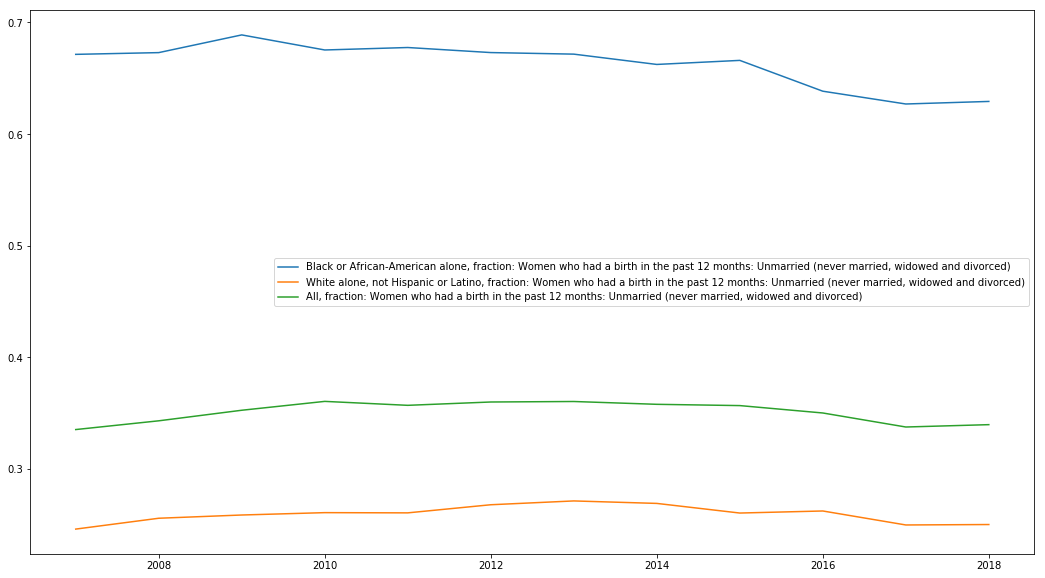

In [20]:
#For plotting 

from numpy import *
import math
import matplotlib.pyplot as plt

import pandas as pd
from matplotlib.pyplot import *


addedLabels1=['Black or African-American alone, fraction: Women who did not have a birth in the past 12 months',
              "White alone, not Hispanic or Latino, fraction: Women who did not have a birth in the past 12 months",
              "All, fraction: Women who did not have a birth in the past 12 months"]


addedLabels2=['Black or African-American alone, fraction: Women who had a birth in the past 12 months: Now married (including separated and spouse absent)',
              'White alone, not Hispanic or Latino, fraction: Women who had a birth in the past 12 months: Now married (including separated and spouse absent)',
              'All, fraction: Women who had a birth in the past 12 months: Now married (including separated and spouse absent)']


addedLabels3=['Black or African-American alone, fraction: Women who had a birth in the past 12 months: Unmarried (never married, widowed and divorced)',
              "White alone, not Hispanic or Latino, fraction: Women who had a birth in the past 12 months: Unmarried (never married, widowed and divorced)",
              "All, fraction: Women who had a birth in the past 12 months: Unmarried (never married, widowed and divorced)"]



frame=excelVersion
fig, ax = subplots()
for item in addedLabels3:
    frame[item].plot(figsize=(18,10), ax=ax)
    
ax.legend(addedLabels3)